# CMIP global climate models

<b>Table of Contents</b>

- Overview
- Setup
    - Get authentication token
- Data layers
    - Data layer dimensions
- Querying the data layers
    - Point query
    - Raster query
- References


## Overview

The Coupled Model Intercomparison Project (CMIP6) protocol was endorsed in 2014 and consists of global climate simulations from around 100 distinct climate models being produced across 49 different modeling groups. CMIP6 represents a substantial expansion over CMIP5, in terms of the number of modeling groups participating, a new set of emissions scenarios driven by different socioeconomic assumptions have been developed called Shared Socioeconomic Pathways (SSPs) which drive the climate models for CMIP6.

Let us get a practical understanding about this dataset and its usage through this tutorial.

## Setup

Before starting, you have to install IBM EI Geospatial python SDK i.e ibmpairs and other modules needed to run this sample ,mentioned in the cell below.

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial APIs' credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your Geospatial APIs API key>
api.tenant_id = <Your Geospatial APIs Tenant ID>
api.org_id = <Your Geospatial APIs Org ID>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../../../auth/secrets.ini')```

In [ ]:
%pip install ibmpairs
%pip install configparser
%pip install matplotlib
%pip install ipyplot

In [2]:
import ibmpairs.client as client
import ibmpairs.catalog as catalog
import ibmpairs.query as query
import pandas as pd
import configparser
import json
import numpy as np
from PIL import Image as PILImage
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os
from datetime import datetime
from dateutil.relativedelta import relativedelta

Now, we shall create a client object using the API_KEY, TENANT_ID (or CLIENT_ID) and ORG_ID to create an authenticated HTTP client Authentication token using 'ibmpairs.client' module, to use it in the subsequent steps.

### Get authentication token

In [3]:
config = configparser.RawConfigParser()
config.read('../../../../auth/secrets.ini')
# Best practice is not to include secrets in source code so we read
# an api key, tenant id and org id from a secrets.ini file.
# You could set the credentials in-line here but we don't
# recommend it for security reasons.

EI_API_KEY    = config.get('EI', 'api.api_key')
EI_TENANT_ID  = config.get('EI', 'api.tenant_id') 
EI_ORG_ID     = config.get('EI', 'api.org_id')  

EI_client_v3  = client.get_client(api_key   = EI_API_KEY,
                                    tenant_id = EI_TENANT_ID,
                                    org_id    = EI_ORG_ID,
                                    legacy    = False,
                                    version   = 3
                                   )

2025-01-20 17:40:27 - paw - INFO - The client authentication method is assumed to be OAuth2.
2025-01-20 17:40:27 - paw - INFO - Legacy Environment is False
2025-01-20 17:40:27 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2025-01-20 17:40:29 - paw - INFO - Authentication success.
2025-01-20 17:40:29 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


## Data layers

We would start by querying the ibmpairs catalog to retrieve the Data Set ID and the Data Layers that form the Data Set.

In [146]:
pd.set_option('display.max_colwidth', None)
search_df=catalog.search("CMIP global climate models")
search_df[['dataset_id','data_layer_id','data_layer_name','data_layer_description_short','data_layer_level','data_layer_type','data_layer_unit','data_set_name','data_set_description_short']]

,dataset_id,data_layer_id,data_layer_name,data_layer_description_short,data_layer_level,data_layer_type,data_layer_unit,data_set_name,data_set_description_short
0,565,56500,EC-Earth3 ssp126 pr,EC-Earth3 daily ssp126 pr from CMIP6 experiment: HISTORICAL (1850-2014). Data derived from member_id r1i1p1f1 by default,12,Raster,,CMIP global climate models,Climate simulations from approximately 100 distinct climate models across 49 modelling groups provide a set of coordinated climate model experiments.
1,565,56501,EC-Earth3 ssp126 sfcWind,EC-Earth3 daily ssp126 sfcWind from CMIP6 experiment: HISTORICAL (1850-2014). Data derived from member_id r1i1p1f1 by default,12,Raster,,CMIP global climate models,Climate simulations from approximately 100 distinct climate models across 49 modelling groups provide a set of coordinated climate model experiments.
2,565,56502,EC-Earth3 ssp126 huss,EC-Earth3 daily ssp126 huss from CMIP6 experiment: HISTORICAL (1850-2014). Data derived from member_id r1i1p1f1 by default,12,Raster,,CMIP global climate models,Climate simulations from approximately 100 distinct climate models across 49 modelling groups provide a set of coordinated climate model experiments.
3,565,56503,EC-Earth3 ssp126 hurs,EC-Earth3 daily ssp126 hurs from CMIP6 experiment: HISTORICAL (1850-2014). Data derived from member_id r1i1p1f1 by default,12,Raster,,CMIP global climate models,Climate simulations from approximately 100 distinct climate models across 49 modelling groups provide a set of coordinated climate model experiments.
4,565,56504,EC-Earth3 ssp126 tas,EC-Earth3 daily ssp126 tas from CMIP6 experiment: HISTORICAL (1850-2014). Data derived from member_id r1i1p1f1 by default,12,Raster,,CMIP global climate models,Climate simulations from approximately 100 distinct climate models across 49 modelling groups provide a set of coordinated climate model experiments.
5,565,56505,EC-Earth3 ssp126 rlds,EC-Earth3 daily ssp126 rlds from CMIP6 experiment: HISTORICAL (1850-2014). Data derived from member_id r1i1p1f1 by default,12,Raster,,CMIP global climate models,Climate simulations from approximately 100 distinct climate models across 49 modelling groups provide a set of coordinated climate model experiments.
6,565,56506,EC-Earth3 ssp126 tasmin,EC-Earth3 daily ssp126 tasmin from CMIP6 experiment: HISTORICAL (1850-2014). Data derived from member_id r1i1p1f1 by default,12,Raster,,CMIP global climate models,Climate simulations from approximately 100 distinct climate models across 49 modelling groups provide a set of coordinated climate model experiments.
7,565,56507,EC-Earth3 ssp126 tasmax,EC-Earth3 daily ssp126 tasmax from CMIP6 experiment: HISTORICAL (1850-2014). Data derived from member_id r1i1p1f1 by default,12,Raster,,CMIP global climate models,Climate simulations from approximately 100 distinct climate models across 49 modelling groups provide a set of coordinated climate model experiments.
8,565,56508,EC-Earth3 ssp126 rsds,EC-Earth3 daily ssp126 rsds from CMIP6 experiment: HISTORICAL (1850-2014). Data derived from member_id r1i1p1f1 by default,12,Raster,,CMIP global climate models,Climate simulations from approximately 100 distinct climate models across 49 modelling groups provide a set of coordinated climate model experiments.


As seen above, the CMIP global climate models Data Set of ID 565 has nine Data Layers. The naming of the Data Layers follows the convention of `Model_Name Scenario Variable`. For example, for Data Layer EC-Earth3 ssp126 pr, EC-Earth3 is `Model_Name`, ssp126 is `Scenario` and pr is `Variable`.

- `Model_Name` refers to a specific global climate model developed by the EC-Earth Consortium. In this case, EC-Earth3 is the third version of the EC-Earth model, which is a coupled climate system model that simulates interactions between the atmosphere, oceans, land surface, and ice.
- `Scenario` refers to a specific Shared Socioeconomic Pathway (SSP) scenario. SSPs are used in CMIP6 to explore different future pathways based on varying levels of greenhouse gas emissions, socioeconomic developments, and climate policy actions. In this case, SSP126 corresponds to a "low-emissions" scenario where global greenhouse gas emissions peak in the 2020s and then decline significantly, aligning with more ambitious climate mitigation efforts.
- `Variable` refers to the climate variable or field that the model is simulating. These are the physical quantities output by the model that describe different aspects of the climate system:
  - `pr` refers to precipitation. This variable represents the amount of precipitation that falls on the Earth’s surface, including both rain and snow.
  - `sfcWind` refers to surface wind speed. This variable represents the wind at or near the Earth’s surface.
  - `huss` refers to surface specific humidity. It represents the amount of water vapor in the air near the Earth’s surface.
  - `hurs` refers to surface relative humidity. This variable represents the percentage of the maximum amount of water vapor the air can hold at a given temperature.
  - `rlds` refers to downward longwave radiation. This is the radiation emitted from the Earth’s surface and atmosphere back toward the surface, including infrared radiation (heat).
  - `tasmin` refers to the minimum daily temperature at the surface. This is the lowest temperature observed during a 24-hour period.
  - `tasmax` refers to the maximum daily temperature at the surface. This is the highest temperature observed during a 24-hour period.
  - `rsds` refers to downward shortwave radiation. This is the incoming solar radiation reaching the Earth’s surface

Each of the Data Layers are identified by a unique Data Layer ID. To gain a better understanding of the Data Set and its geospatial and temporal coverage as well as other relevant metadata, we can make further queries to the ibmpairs catalog submodule as mentioned in the [tutorials](https://ibm.github.io/ibmpairs/tutorials/quickstart/quickstartcatalog.html).

### Data layer dimensions
Every Data Layer of the CMIP6 Data Set has `member_id` as it's dimension which refers to a specific identifier that is used to distinguish between different realizations or ensemble members of a given climate model experiment. The ensemble members are crucial for the analysis of model uncertainty and for understanding the variability across different realizations of a given scenario. The dimension values represent a specific ensemble member from a CMIP (Coupled Model Intercomparison Project) simulation, often used in climate model data. 

This string encodes information about several aspects of the model run, including the realization, initialization, physics version, and forcing scenario. For example, in `r1i1p1f1_v1.2` `r1` means the first realization of the ensemble, `i1` means the first set of initialization conditions, `p1` means the first set of physical parameterizations used in the model, `f1` typically corresponds to the first forcing scenario, in this case related to SSP126 and the version `v1.2` indicates the second version of the model, which might include updates or refinements to the physics, initialization, or forcing scenarios.The combination of these indices allows researchers to track and differentiate between various model runs, ensuring that they know exactly what conditions, parameterizations, and versions were used for each ensemble member in the dataset.

For more understanding of the CMIP global climate models  Data Layer Dimensions, we can make further queries to the ibmpairs catalog submodule as mentioned in the [tutorials](https://ibm.github.io/ibmpairs/tutorials/quickstart/quickstartcatalog.html).

Refer the table below for CMIP global climate models Data Layers and its Dimensions. 

#### List of the data layer dimensions

<div style="display: inline-block">
    
| Data Layer ID | Data Layer Name   | Dimensions |Dimensions Values|
|:---------------|:-------------------|:---------   |:-------------- |
| 56500         | EC-Earth3 ssp126 pr       |   member_id   |  r1i1p1f1_v1.1   | 
| 56501         | EC-Earth3 ssp126 sfcWind  |   member_id   |  r1i1p1f1        |
| 56502         | EC-Earth3 ssp126 huss     |   member_id   |  r1i1p1f1        | 
| 56503         | EC-Earth3 ssp126 hurs     |   member_id   |  r1i1p1f1_v1.1   | 
| 56504         | EC-Earth3 ssp126 tas      |   member_id   |  r1i1p1f1_v1.1   | 
| 56505         | EC-Earth3 ssp126 rlds     |   member_id   |  r1i1p1f1        | 
| 56506         | EC-Earth3 ssp126 tasmin   |   member_id   |  r1i1p1f1_v1.2   | 
| 56507         | EC-Earth3 ssp126 tasmax   |   member_id   |  r1i1p1f1        | 
| 50508         | EC-Earth3 ssp126 rsds     |   member_id   |  r1i1p1f1        | 

## Querying the data layers
### Point query
Next, let us make a point query for two different locations that provides essential information to analyze and understand various climate phenomena. We can give a list of the Data Layers of CMIP6 Data Set in the form of Data Layer Id, the point coordinates of the locations, temporal period and the respective Data Layer Dimension value to observe the climate projections in the specified locations.

In [141]:
query_result = query.submit(
    {
        "layers" : [
            {
                "type" : "raster", 
                "id" : "56500",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster", 
                "id" : "56501", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56502", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56503",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56504",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56505",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster", 
                "id" : "56506", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.2" }]
            },
            {
                "type" : "raster", 
                "id" : "56507", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56508", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            }
        ],
        "spatial" : {
            "type" : "point",
            "coordinates": [
                12.835474, 77.582174,   #India
                46.487854, 2.076227,    #France
            ]
        },
        "temporal" : {
            "intervals" : [
                {
                    "start" : "2027-08-01T00:00:00Z", 
                    "end" : "2027-08-02T23:59:59Z"
                }
            ]
        }
    }, client=EI_client_v3)

# Convert the results to a dataframe
point_df = query_result.point_data_as_dataframe()
point_df['value'] = point_df['value'].apply(lambda x: '{:.6f}'.format(float(x)))
point_df['datetime'] = pd.to_datetime(point_df['timestamp'] , unit='ms', errors = 'coerce')
point_df['datetime'] = point_df['datetime'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
point_df = point_df.drop(columns=['timestamp'])
point_df

2025-01-10 18:31:48 - paw - INFO - TASK: submit STARTING.
2025-01-10 18:31:55 - paw - INFO - TASK: submit COMPLETED.


,layer_id,layer_name,dataset,longitude,latitude,value,property,datetime
0,56500,EC-Earth3 ssp126 pr,CMIP global climate models,77.582174,12.835474,0.000133,member_id:r1i1p1f1_v1.1,2027-08-01T00:00:00Z
1,56500,EC-Earth3 ssp126 pr,CMIP global climate models,2.076227,46.487854,0.000000,member_id:r1i1p1f1_v1.1,2027-08-01T00:00:00Z
2,56500,EC-Earth3 ssp126 pr,CMIP global climate models,77.582174,12.835474,0.000208,member_id:r1i1p1f1_v1.1,2027-08-02T00:00:00Z
3,56500,EC-Earth3 ssp126 pr,CMIP global climate models,2.076227,46.487854,0.000000,member_id:r1i1p1f1_v1.1,2027-08-02T00:00:00Z
4,56501,EC-Earth3 ssp126 sfcWind,CMIP global climate models,77.582174,12.835474,3.538529,member_id:r1i1p1f1,2027-08-01T00:00:00Z
5,56501,EC-Earth3 ssp126 sfcWind,CMIP global climate models,2.076227,46.487854,1.515937,member_id:r1i1p1f1,2027-08-01T00:00:00Z
6,56501,EC-Earth3 ssp126 sfcWind,CMIP global climate models,77.582174,12.835474,2.241553,member_id:r1i1p1f1,2027-08-02T00:00:00Z
7,56501,EC-Earth3 ssp126 sfcWind,CMIP global climate models,2.076227,46.487854,1.909218,member_id:r1i1p1f1,2027-08-02T00:00:00Z
8,56502,EC-Earth3 ssp126 huss,CMIP global climate models,77.582174,12.835474,0.020072,member_id:r1i1p1f1,2027-08-01T00:00:00Z
9,56502,EC-Earth3 ssp126 huss,CMIP global climate models,2.076227,46.487854,0.012735,member_id:r1i1p1f1,2027-08-01T00:00:00Z


We see above, the values for different climate variables that are obtained for various locations and dates we queried for. For instance, for the location 12.835474,77.582174 that we queried for, on 01/08/2027 resulted in the value 0.000133 mm for the Data Layer 'EC-Earth3 ssp126 pr' corresponding to precipitation with Data Layer ID as 56500 for the dimension r1i1p1f1_v1.1.

Note: The comments within the query JSON, intended for descriptive purposes, may cause compatibility issues in other programming languages and should be removed when using the data in those contexts.

### Raster query
Next, we shall make a raster query for a square area to observe it's climatic characteristics. 

In [142]:
cmip6_result = query.submit_check_status_and_download(
    {
        "publish": True,
        "name": "CMIP Global Climate Models analysis for a region in Asia",
        "spatial": {
            "type": "square",
            "coordinates": [
                26.350434, 58.726672,
                51.742015, 91.307494
            ]
        },
        "temporal": {
            "intervals": [
                  {
                    "start": "2026-08-06T00:00:00Z",
                    "end": "2026-08-06T00:00:00Z"
                  }
            ]
        },
        "layers" : [
            {
                "type" : "raster",
                "id" : "56500",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56501",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56502", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56503", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56504", 
                "dimensions": [{ "name": "member_id","value": "r1i1p1f1_v1.1" }]
            },
            {
                "type" : "raster",
                "id" : "56505",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56506", 
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1_v1.2" }]
            },
            {
                "type" : "raster",
                "id" : "56507",
                "dimensions": [{ "name": "member_id", "value": "r1i1p1f1" }]
            },
            {
                "type" : "raster",
                "id" : "56508", 
                "dimensions": [{ "name": "member_id","value": "r1i1p1f1" }]
            }
        ]
    }, client=EI_client_v3)

2025-01-10 18:37:53 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-01-10 18:37:55 - paw - INFO - The query was successfully submitted with the id: 1736510400_04075175.
2025-01-10 18:37:56 - paw - INFO - The query 1736510400_04075175 has the status Queued.
2025-01-10 18:38:27 - paw - INFO - The query 1736510400_04075175 has the status Running.
2025-01-10 18:38:58 - paw - INFO - The query 1736510400_04075175 has the status Succeeded.
2025-01-10 18:38:58 - paw - INFO - The query 1736510400_04075175 was successful after checking the status.
2025-01-10 18:39:29 - paw - INFO - The query 1736510400_04075175 has the status Succeeded.
2025-01-10 18:39:29 - paw - INFO - The query 1736510400_04075175 was successful after checking the status.
2025-01-10 18:39:29 - paw - INFO - The query download folder is set to the path /Users/environmental-intelligence/Environmental-Intelligence-internal/geospatial_analytics/v3_apis/samples/industry_use_cases/datasets/global_climate_models_

The query takes a few seconds to complete and downloads the output as a zip file in the /download folder within the same location as this notebook. Now we shall display the resultant tiffs using the following utility function.

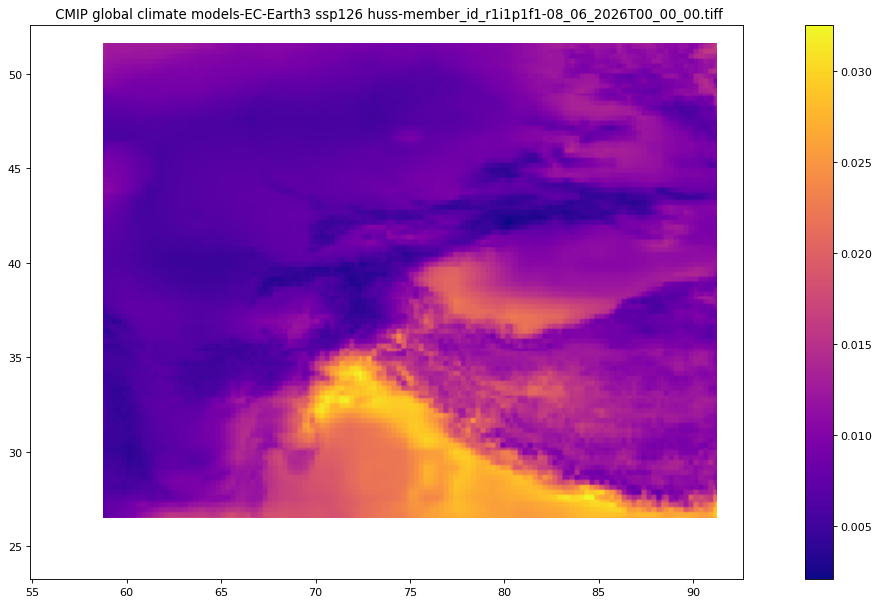

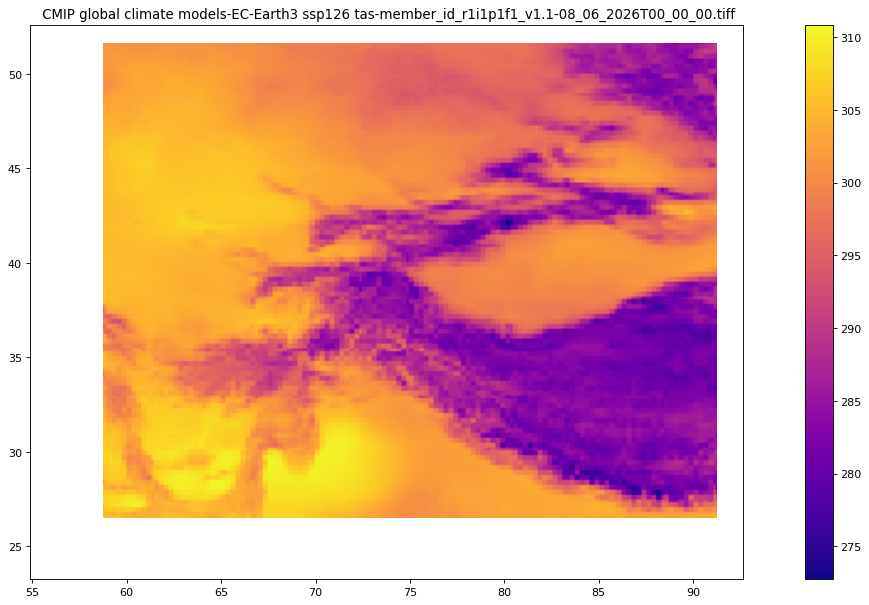

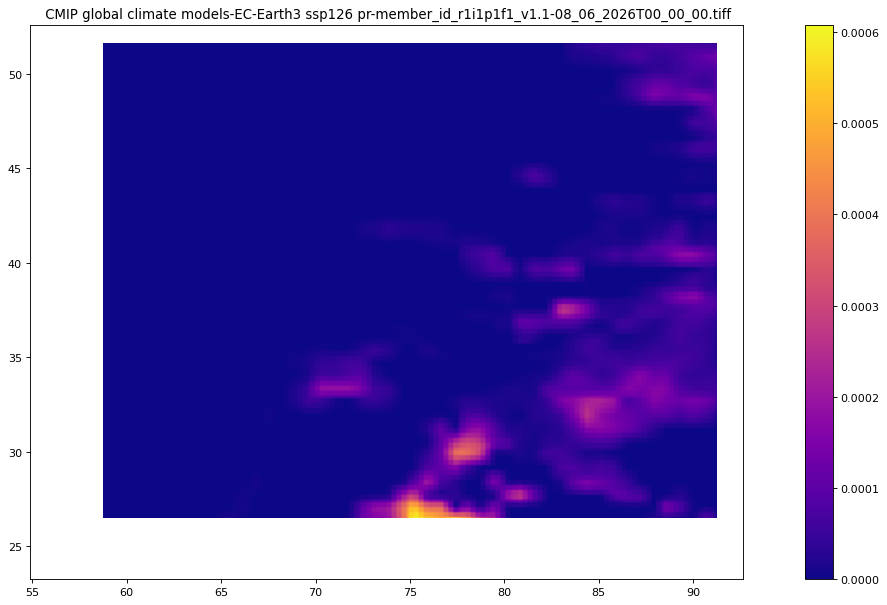

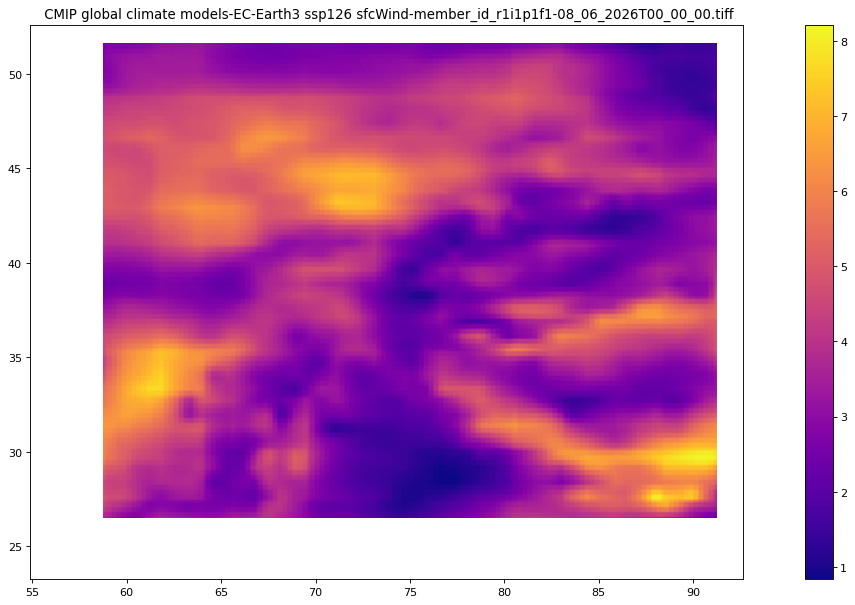

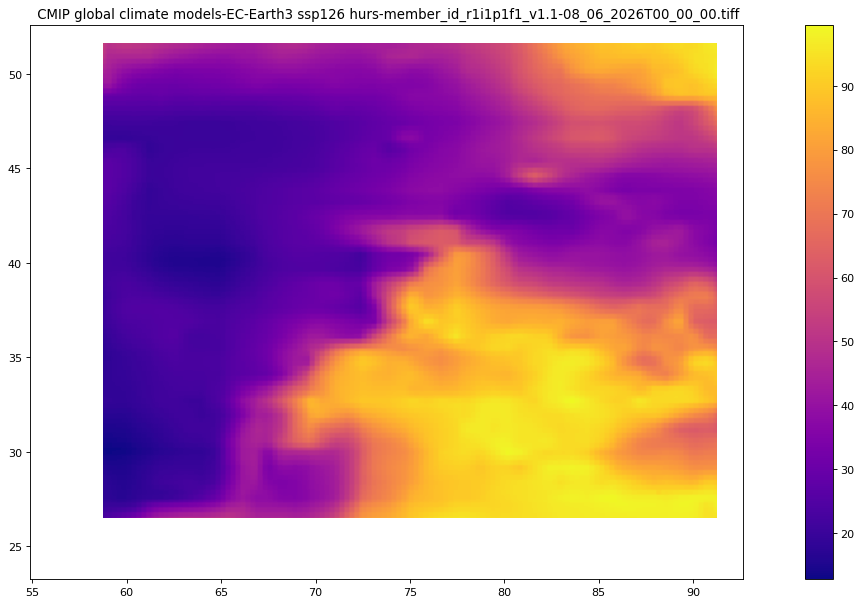

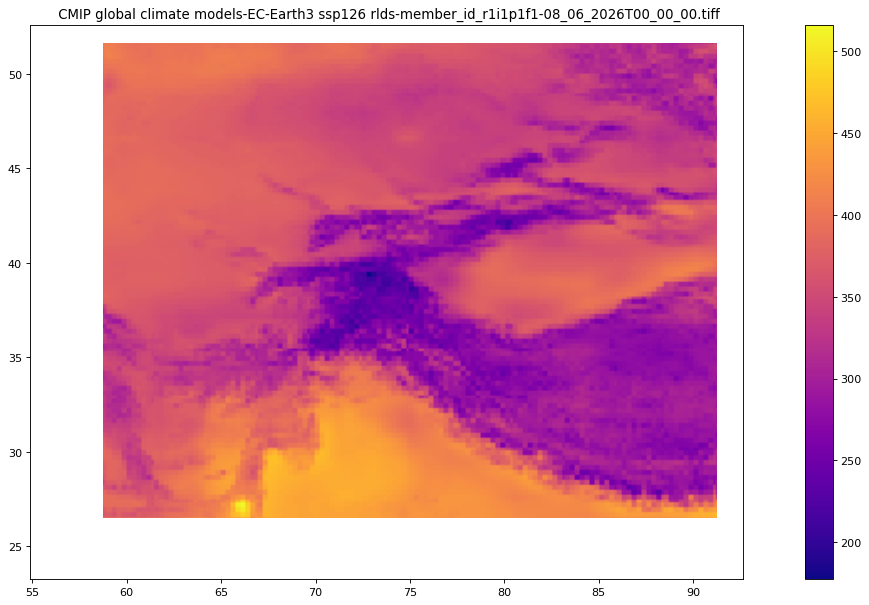

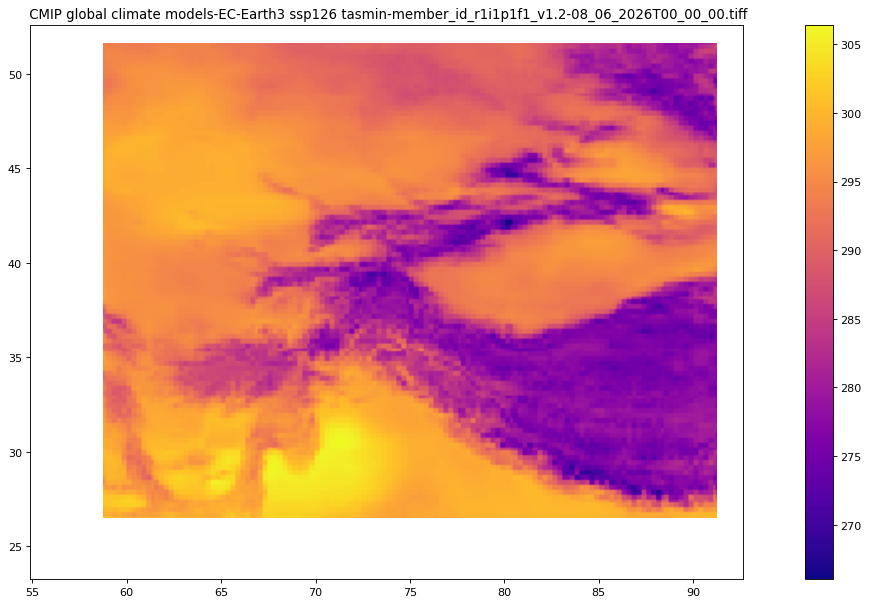

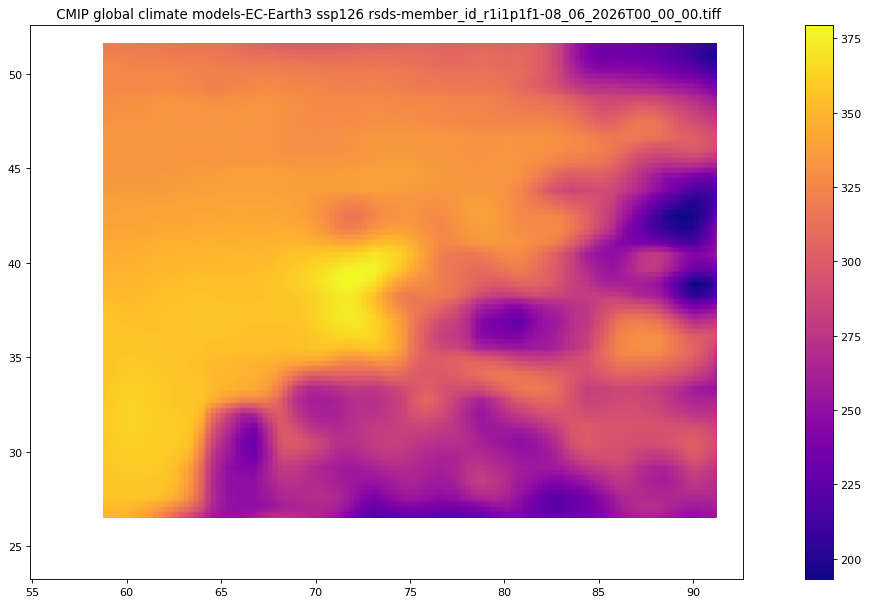

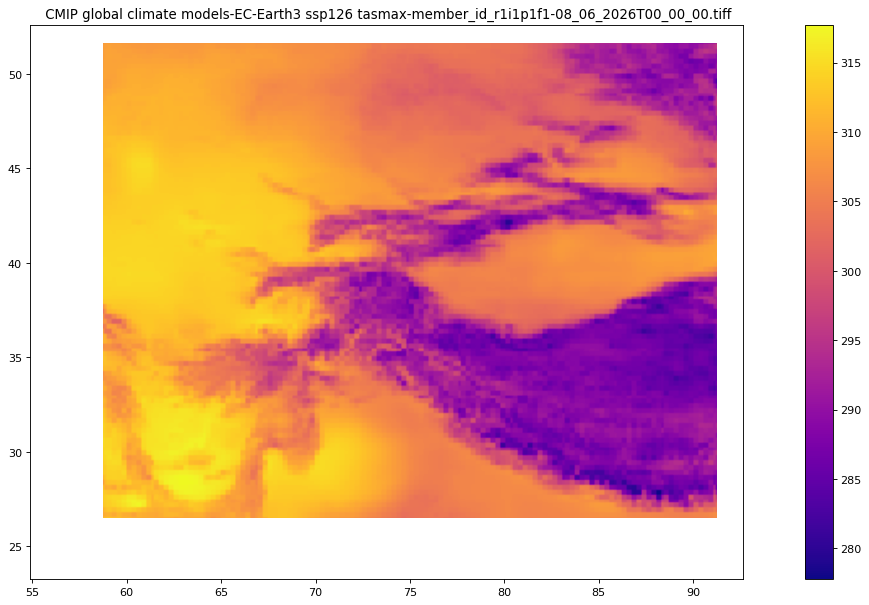

In [143]:
# Function to display the resulting Tiff(s).
cmip6_file_list = cmip6_result.list_files()
output_image_array = []
for file in cmip6_file_list:
    if file.endswith('.tiff'): #display the raster images
        with open(file+'.json', 'r') as summary_file:
            fileparms = json.load(summary_file)
        boundingBox=fileparms["boundingBox"]
        pixelStatistics=fileparms["rasterStatistics"]
        myextent=[boundingBox["minLongitude"],
                  boundingBox["maxLongitude"],
                  boundingBox["minLatitude"],
                  boundingBox["maxLatitude" ]]  
        array_cmip6 = np.array(PILImage.open(file))
        mask = (array_cmip6 == -9999)
        # Masked array to exclude NO Data points from plotting
        masked_array = np.ma.masked_array(array_cmip6, mask)
        plt.figure(figsize = (20, 9), dpi=80) # Sets the size and resolution of the plot
        plt.imshow(masked_array,
                   cmap = 'plasma',
                   vmin=pixelStatistics["pixelMin"],
                   vmax=pixelStatistics["pixelMax"],
                   extent = myextent) # Loads the raster data and sets the colormap
        plt.colorbar() # Adds the color bar
        plt.title(" "+os.path.basename(file))
        output_image_path = os.path.splitext(os.path.basename(file))[0] + ".png"
        plt.savefig(output_image_path, bbox_inches='tight')
        output_image_array.append(output_image_path)
        plt.close()

for output_image in output_image_array:
    #display the raster images
    display(Image(output_image,width=800, height=400))

Each of the images above represents information on different climate variables for the specified location and temporal period. The color gradient provides a visual representation of the magnitude and distribution of the climate data, making it easier to interpret regional differences and trends in climate conditions.

## References
- https://www.carbonbrief.org/cmip6-the-next-generation-of-climate-models-explained/
- https://www.wcrp-climate.org/wgcm-cmip/cmip-video
- https://wcrp-cmip.org/cmip6/